# Cloning the repository

In [1]:
!git clone https://github.com/robert-abc/KTC2023-ABC1.git --branch main

Cloning into 'KTC2023-ABC1'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 112 (delta 16), reused 30 (delta 11), pack-reused 72
Receiving objects: 100% (112/112), 12.49 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
%cd KTC2023-ABC1/KTC2023_Codes_1_Github

/content/KTC2023-ABC1/KTC2023_Codes_1_Github


# Generate the results

In [3]:
!python main_python.py TrainingData PythonCodes/outputs 1

2024-03-16 18:58:26.553443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 18:58:26.553513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 18:58:26.555697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 18:58:26.572643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 18:58:29.727752: W tensorflow/compiler/tf2

# Visualize the results



In [4]:
import os
import re
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
gt_name=os.listdir('GroundTruths')
out_name=os.listdir('PythonCodes/outputs')

r=re.compile(".*mat")

gt_name=list(filter(r.match,gt_name))
out_name=list(filter(r.match,out_name))

gt_name.sort()
out_name.sort()

In [6]:
img_list=[]

for i in range(len(gt_name)):
  ground = sp.io.loadmat(os.path.join('GroundTruths', gt_name[i]))
  ground = ground['truth']
  output = sp.io.loadmat(os.path.join('PythonCodes/outputs', out_name[i]))
  output = output['reconstruction']

  img_list.append([ground,output])

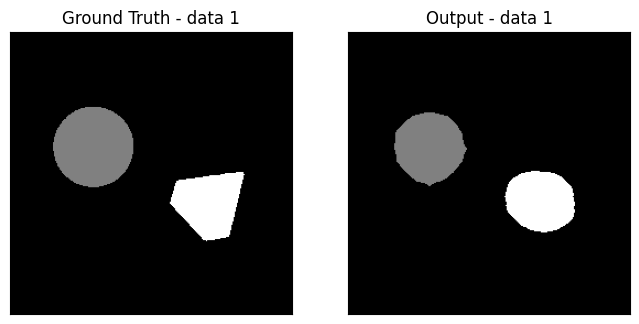

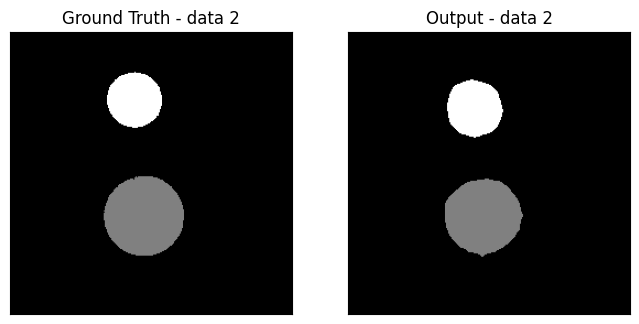

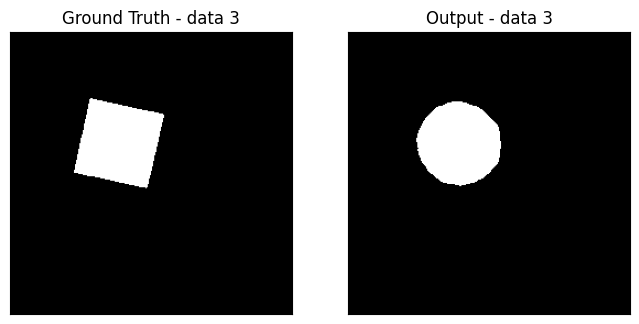

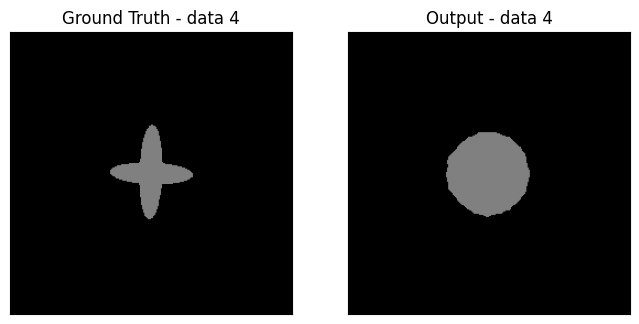

In [7]:
for i in range(4):
  plt.figure(figsize=[8,4])
  plt.subplot(1,2,1)
  plt.imshow(img_list[i][0], cmap='gray', vmin=0, vmax=2)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Ground Truth - data {i+1}")

  plt.subplot(1,2,2)
  plt.imshow(img_list[i][1], cmap='gray', vmin=0, vmax=2)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Output - data {i+1}")

  plt.show()